# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
# for i in range(1, 6):                                      # play game for 5 episodes
#     env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
#     states = env_info.vector_observations                  # get the current state (for each agent)
#     scores = np.zeros(num_agents)                          # initialize the score (for each agent)
#     while True:
#         actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#         actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#         env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#         next_states = env_info.vector_observations         # get next state (for each agent)
#         rewards = env_info.rewards                         # get reward (for each agent)
#         dones = env_info.local_done                        # see if episode finished
#         scores += env_info.rewards                         # update the score (for each agent)
#         states = next_states                               # roll over states to next time step
#         if np.any(dones):                                  # exit loop if episode finished
#             break
#     print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
import random
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
import time

from ddpg_agent import Agent

In [8]:
env_info = env.reset(train_mode=True)[brain_name]
# env.seed(10)
states = env_info.vector_observations
state_size = states.shape[1]
action_size = brain.vector_action_space_size

agent = Agent(state_size=state_size, action_size=action_size, random_seed=10)
agent.print()

BUFFER_SIZE 1000000
BATCH_SIZE 128
GAMMA 0.99
TAU 0.01
LR_ACTOR 0.0001
LR_CRITIC 0.001
WEIGHT_DECAY 0
noise.theta 0.75
fc1 Linear(in_features=24, out_features=400, bias=True)
bn1 None
fc2 Linear(in_features=400, out_features=300, bias=True)
fc3 Linear(in_features=300, out_features=300, bias=True)
fc4 Linear(in_features=300, out_features=2, bias=True)


Episode 1	Last 1 Average Score: -0.00	Average Score: -0.00	Time 0.09070420265197754
New Hi-Score! Episode 1	Last 1 Average Score: -0.00
Episode 2	Last 2 Average Score: -0.00	Average Score: -0.00	Time 0.4566556215286255
Episode 3	Last 3 Average Score: -0.00	Average Score: -0.00	Time 0.3344727357228597
Episode 4	Last 4 Average Score: -0.00	Average Score: -0.00	Time 0.27430862188339233
Episode 5	Last 5 Average Score: -0.00	Average Score: -0.00	Time 0.3011766910552979
Episode 6	Last 6 Average Score: -0.00	Average Score: -0.00	Time 0.3518277406692505
Episode 7	Last 7 Average Score: -0.00	Average Score: -0.00	Time 0.3971660818372454
Episode 8	Last 8 Average Score: -0.00	Average Score: -0.00	Time 0.4208144247531891
Episode 9	Last 9 Average Score: -0.00	Average Score: -0.00	Time 0.4420629342397054
Episode 10	Last 10 Average Score: -0.00	Average Score: -0.00	Time 0.46170241832733155
Episode 11	Last 11 Average Score: -0.00	Average Score: -0.00	Time 0.4729788303375244
Episode 12	Last 12 Average S

Episode 96	Last 96 Average Score: -0.00	Average Score: -0.00	Time 0.8432540744543076
Episode 97	Last 97 Average Score: -0.00	Average Score: -0.00	Time 0.8416907836481468
Episode 98	Last 98 Average Score: -0.00	Average Score: -0.00	Time 0.8412373479531736
Episode 99	Last 99 Average Score: -0.00	Average Score: -0.00	Time 0.8414471221692634
Episode 100	Last 100 Average Score: -0.00	Average Score: -0.00	Time 0.8417417788505555
Episode 101	Last 100 Average Score: -0.00	Average Score: -0.00	Time 0.8408775140743444
Episode 102	Last 100 Average Score: -0.00	Average Score: 0.05	Time 0.8501708227045396
New Hi-Score! Episode 102	Last 100 Average Score: -0.00
Episode 103	Last 100 Average Score: -0.00	Average Score: 0.05	Time 0.8580642811303
New Hi-Score! Episode 103	Last 100 Average Score: -0.00
Episode 104	Last 100 Average Score: -0.00	Average Score: -0.00	Time 0.857867039166964
Episode 105	Last 100 Average Score: -0.00	Average Score: 0.05	Time 0.8647167909713018
New Hi-Score! Episode 105	Last 10

Episode 187	Last 100 Average Score: -0.00	Average Score: -0.00	Time 0.8841811106166738
Episode 188	Last 100 Average Score: -0.00	Average Score: -0.00	Time 0.8835206539072888
Episode 189	Last 100 Average Score: 0.00	Average Score: 0.05	Time 0.8883967828498316
New Hi-Score! Episode 189	Last 100 Average Score: 0.00
Episode 190	Last 100 Average Score: 0.00	Average Score: 0.05	Time 0.8932283991261533
New Hi-Score! Episode 190	Last 100 Average Score: 0.00
Episode 191	Last 100 Average Score: 0.00	Average Score: -0.00	Time 0.8931066378248924
Episode 192	Last 100 Average Score: 0.00	Average Score: 0.05	Time 0.8985676554342111
New Hi-Score! Episode 192	Last 100 Average Score: 0.00
Episode 193	Last 100 Average Score: 0.00	Average Score: 0.05	Time 0.9037663405423337
Episode 194	Last 100 Average Score: 0.00	Average Score: -0.00	Time 0.9059436272100075
Episode 195	Last 100 Average Score: 0.00	Average Score: 0.05	Time 0.9129120533282941
Episode 196	Last 100 Average Score: 0.00	Average Score: 0.05	Tim

Episode 266	Last 100 Average Score: 0.02	Average Score: 0.05	Time 1.1162991676115452
New Hi-Score! Episode 266	Last 100 Average Score: 0.02
Episode 267	Last 100 Average Score: 0.02	Average Score: 0.05	Time 1.1189461709854756
New Hi-Score! Episode 267	Last 100 Average Score: 0.02
Episode 268	Last 100 Average Score: 0.02	Average Score: 0.05	Time 1.1215616740397554
New Hi-Score! Episode 268	Last 100 Average Score: 0.02
Episode 269	Last 100 Average Score: 0.02	Average Score: 0.10	Time 1.1279873360488495
New Hi-Score! Episode 269	Last 100 Average Score: 0.02
Episode 270	Last 100 Average Score: 0.02	Average Score: 0.05	Time 1.1305454607363101
New Hi-Score! Episode 270	Last 100 Average Score: 0.02
Episode 271	Last 100 Average Score: 0.02	Average Score: 0.05	Time 1.1333091522934693
New Hi-Score! Episode 271	Last 100 Average Score: 0.02
Episode 272	Last 100 Average Score: 0.02	Average Score: 0.05	Time 1.1356688913177042
New Hi-Score! Episode 272	Last 100 Average Score: 0.02
Episode 273	Last 100

Episode 332	Last 100 Average Score: 0.05	Average Score: 0.15	Time 1.340004041252366
New Hi-Score! Episode 332	Last 100 Average Score: 0.05
Episode 333	Last 100 Average Score: 0.05	Average Score: 0.05	Time 1.34176486390489
New Hi-Score! Episode 333	Last 100 Average Score: 0.05
Episode 334	Last 100 Average Score: 0.05	Average Score: 0.10	Time 1.3475991758757722
New Hi-Score! Episode 334	Last 100 Average Score: 0.05
Episode 335	Last 100 Average Score: 0.05	Average Score: 0.05	Time 1.3490192377745216
New Hi-Score! Episode 335	Last 100 Average Score: 0.05
Episode 336	Last 100 Average Score: 0.05	Average Score: 0.10	Time 1.3549291363784246
New Hi-Score! Episode 336	Last 100 Average Score: 0.05
Episode 337	Last 100 Average Score: 0.06	Average Score: 0.15	Time 1.3644786312601334
New Hi-Score! Episode 337	Last 100 Average Score: 0.06
Episode 338	Last 100 Average Score: 0.06	Average Score: 0.10	Time 1.3701025198197223
New Hi-Score! Episode 338	Last 100 Average Score: 0.06
Episode 339	Last 100 Av

Episode 399	Last 100 Average Score: 0.14	Average Score: 0.15	Time 2.0268217172837795
New Hi-Score! Episode 399	Last 100 Average Score: 0.14
Episode 400	Last 100 Average Score: 0.14	Average Score: 0.05	Time 2.0265332478284837
Episode 401	Last 100 Average Score: 0.14	Average Score: 0.15	Time 2.0320447983587173
New Hi-Score! Episode 401	Last 100 Average Score: 0.14
Episode 402	Last 100 Average Score: 0.14	Average Score: 0.05	Time 2.0319406588872275
Episode 403	Last 100 Average Score: 0.14	Average Score: 0.05	Time 2.031706801123418
Episode 404	Last 100 Average Score: 0.14	Average Score: 0.10	Time 2.037416195515359
New Hi-Score! Episode 404	Last 100 Average Score: 0.14
Episode 405	Last 100 Average Score: 0.14	Average Score: 0.30	Time 2.0524364665702537
New Hi-Score! Episode 405	Last 100 Average Score: 0.14
Episode 406	Last 100 Average Score: 0.14	Average Score: 0.15	Time 2.0590280030161288
New Hi-Score! Episode 406	Last 100 Average Score: 0.14
Episode 407	Last 100 Average Score: 0.15	Averag

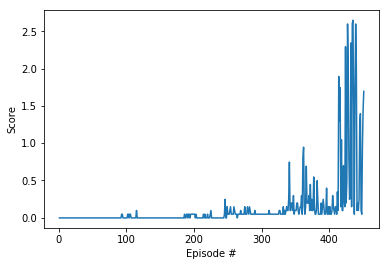

In [9]:
def ddpg(n_episodes=2000, goal_score=0.5):
    total_score_deque = deque(maxlen=100)
    total_score = []
    max_score = -np.Inf
    run_times = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
        states = env_info.vector_observations                 # get the current state (for each agent)
        agent.reset()
        scores = np.zeros(num_agents)                          # initialize the score (for each agent)
        run_times.append(time.time())
        while True:
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                        # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            scores += env_info.rewards                         # update the score (for each agent)

            agent.step(states, actions, rewards, next_states, dones)

            states = next_states                              # roll over states to next time step

            if np.any(dones):
                break
        run_times[-1] = time.time() - run_times[-1]
        mean_score = np.mean(scores)
        total_score_deque.append(mean_score)
        total_score.append(mean_score)
        total_average_score = np.mean(total_score_deque)
        total_run_time = np.sum(run_times)
        average_run_time = np.mean(run_times)

        print('\rEpisode {}\tLast {} Average Score: {:.2f}\tAverage Score: {:.2f}\tTime {}'.format(
            i_episode, len(total_score_deque), total_average_score, mean_score, average_run_time, end=""))
        if i_episode % 20 == 0:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')

        if max_score < total_average_score:
            max_score = total_average_score
            print('\rNew Hi-Score! Episode {}\tLast {} Average Score: {:.2f}'.format(
                i_episode, len(total_score_deque), total_average_score))
        if total_average_score >= goal_score and len(total_score_deque) == total_score_deque.maxlen:
            print('\rGoal achieved at episode {} with score {}'.format(i_episode, total_average_score))
            print('\rTotal run time {}\t Average episode time {}'.format(total_run_time, average_run_time, end=''))
            return total_score

total_score = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(total_score)+1), total_score)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()